In [38]:
from FCA import *

In [39]:
X = pickle.load(open('./my_data/nws_20000nodes_1000neighbors_0.7prob/nws_20walk_graph.pkl', 'rb'))
df_adj_nws = pd.DataFrame(X.T)
df_shifted_dynamics_nws = pd.read_csv("./my_data/nws_20000nodes_1000neighbors_0.7prob/nws_20walk_FCA_shifted_dynamics_8kappa.csv")
df_dynamics_nws = pd.read_csv("./my_data/nws_20000nodes_1000neighbors_0.7prob/nws_20walk_FCA_dynamics_8kappa.csv")
df_g2v_nws = pd.read_csv("./my_data/nws_20000nodes_1000neighbors_0.7prob/nws_20walk_graph2vec.csv")
#df_n2v_nws = pd.read_csv("./my_data/nws_20000nodes_1000neighbors_0.7prob/nws_20walk_node2vec.csv")
df_features_nws = pd.read_csv("./my_data/nws_20000nodes_1000neighbors_0.7prob/nws_20walk_graph_features.csv")

In [40]:
X = pickle.load(open('./my_data/UCLA26_20walk/UCLA26_20walk_graph.pkl', 'rb'))
df_adj_ucla = pd.DataFrame(X.T)
df_dynamics_ucla = pd.read_csv("./my_data/UCLA26_20walk/UCLA26_20walk_FCA_dynamics_8kappa.csv")
df_shifted_dynamics_ucla = pd.read_csv("./my_data/UCLA26_20walk/UCLA26_20walk_FCA_shifted_dynamics_8kappa.csv")
df_g2v_ucla = pd.read_csv("./my_data/UCLA26_20walk/UCLA26_20walk_graph2vec.csv", header=None)
df_n2v_ucla = pd.read_csv("./my_data/UCLA26_20walk/UCLA26_20walk_node2vec.csv", header=None)
df_features_ucla = pd.read_csv("./my_data/UCLA26_20walk/UCLA26_20walk_graph_features.csv")

In [ ]:
"""
print("edge mean:", np.mean(df_features.num_edges))
print("edge std:", np.std(df_features.num_edges))
print("diameter mean:", np.mean(df_features.diameter))
print("diameter std:", np.std(df_features.diameter))
print("===========y==========\n", df_dynamics.y.value_counts())
print("===========baseline_width==========\n", df_dynamics.baseline_width.value_counts())
"""

"""
#ucla sync(conc)+nonsync
df = pd.concat([df_dynamics_ucla[df_dynamics_ucla.baseline_width == True], 
          df_dynamics_ucla[df_dynamics_ucla.y == False]], axis=0).copy()

#ucla sync(conc+nonconc)
df = pd.concat([df_dynamics_ucla[df_dynamics_ucla.baseline_width == True], 
          df_dynamics_ucla[df_dynamics_ucla.baseline_width == False][df_dynamics_ucla.y == True]], axis=0).copy()
df = df.loc[:, 's1_1':'s50_20']
df = df
dict_ucla = sdl_plot(df, Y_data, "temp.jpg")
"""

## Dynamics

In [6]:
#df: dynamics + label
def sdl_plot(df, Y_data, filename):
    under_sampler = RandomUnderSampler(random_state=42)
    X_res, y_res = under_sampler.fit_resample(df, Y_data)
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                        test_size = 0.2, 
                                                        random_state = 4, 
                                                        stratify = y_res)

    xi = 1
    iter_avg = 1
    beta = 0.5
    iteration = 100
    r = 8
    SDL_BCD_class_new = SDL_BCD(X=[X_train.to_numpy().T, y_train.to_numpy().reshape(-1,1).T],  # data, label
                            X_test=[X_test.to_numpy().T, y_test.to_numpy().reshape(-1,1).T],
                            #X_auxiliary = None,
                            n_components=r,  # =: r = number of columns in dictionary matrices W, W'
                            # ini_loading=None,  # Initializatio for [W,W'], W1.shape = [d1, r], W2.shape = [d2, r]
                            # ini_loading=[W_true, np.hstack((np.array([[0]]), Beta_true))],
                            # ini_code = H_true,
                            xi=xi,  # weight on label reconstruction error
                            L1_reg = [0,0,0], # L1 regularizer for code H, dictionary W[0], reg param W[1]
                            L2_reg = [0,0,0], # L2 regularizer for code H, dictionary W[0], reg param W[1]
                            nonnegativity=[True,True,False], # nonnegativity constraints on code H, dictionary W[0], reg params W[1]
                            full_dim=False)

    results_dict_new = SDL_BCD_class_new.fit(iter=iteration, subsample_size=None,
                                                    beta = beta,
                                                    search_radius_const=np.linalg.norm(X_train),
                                                    update_nuance_param=False,
                                                    if_compute_recons_error=False, if_validate=False)



    ncol = 4
    nrow = 2
    fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(ncol*4, nrow*4))
    sorted_indices = np.argsort(results_dict_new["loading"][1][0][1:])[::-1]
    for i in range(r):
        ind = sorted_indices[i]
        sns.heatmap(results_dict_new["loading"][0].T[ind].reshape(50, 20),
                    ax = axs[i//ncol, (i-4)%ncol])
        axs[i//ncol, (i-4)%ncol].title.set_text(str(results_dict_new["loading"][1][0][1:][sorted_indices[i]]))
    fig.savefig(filename)
    return results_dict_new

  2%|▏         | 2/100 [00:00<00:07, 12.59it/s]

initial loading beta [[-0.59072838  0.87517907  0.37900489 -0.65441091 -0.15291733 -0.7124481
   0.29061114  0.24959206  0.47041311]]


100%|██████████| 100/100 [00:08<00:00, 11.57it/s]


!!! pred_type filter


  2%|▏         | 2/100 [00:00<00:08, 11.55it/s]

initial loading beta [[-0.24360857 -0.96736887  0.78135266 -0.57491048 -0.17080085 -0.55508883
  -0.65725274 -0.5159029  -0.84527297]]


100%|██████████| 100/100 [00:08<00:00, 11.17it/s]


!!! pred_type filter


  1%|          | 1/100 [00:00<00:10,  9.57it/s]

initial loading beta [[ 0.752005    0.03173636 -0.97940078  0.93121834  0.19250063  0.80263364
   0.12828324  0.27694329  0.28856108]]


100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


!!! pred_type filter


  1%|          | 1/100 [00:00<00:10,  9.57it/s]

initial loading beta [[ 0.40732468 -0.99100784  0.06976799 -0.39652783  0.56009769  0.42391962
  -0.66423406 -0.24438021 -0.67086398]]


100%|██████████| 100/100 [00:09<00:00, 10.36it/s]


!!! pred_type filter


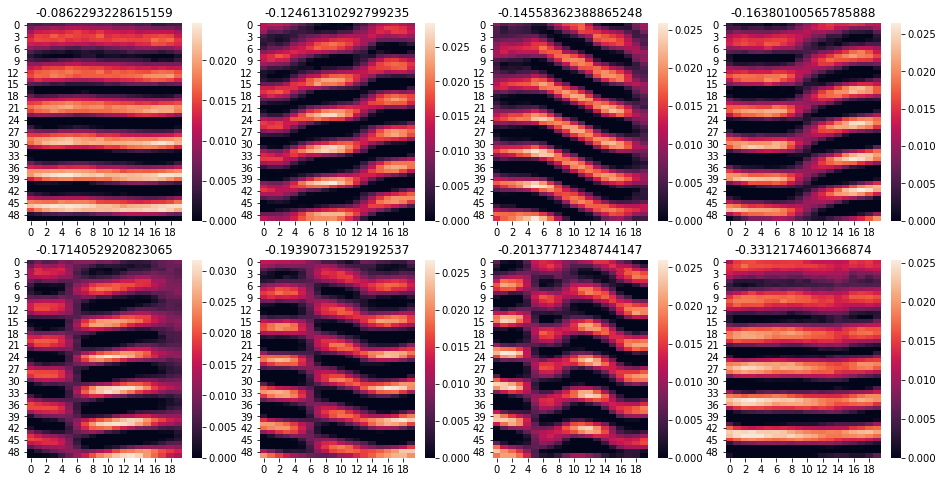

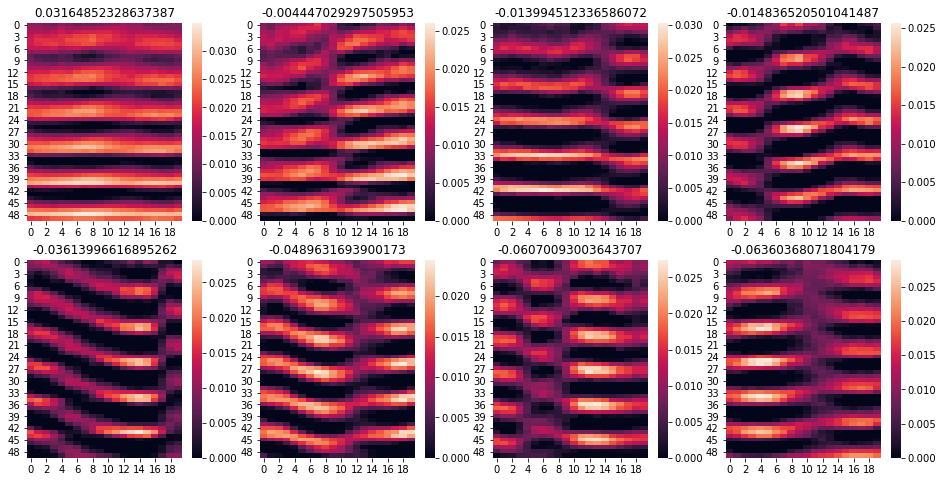

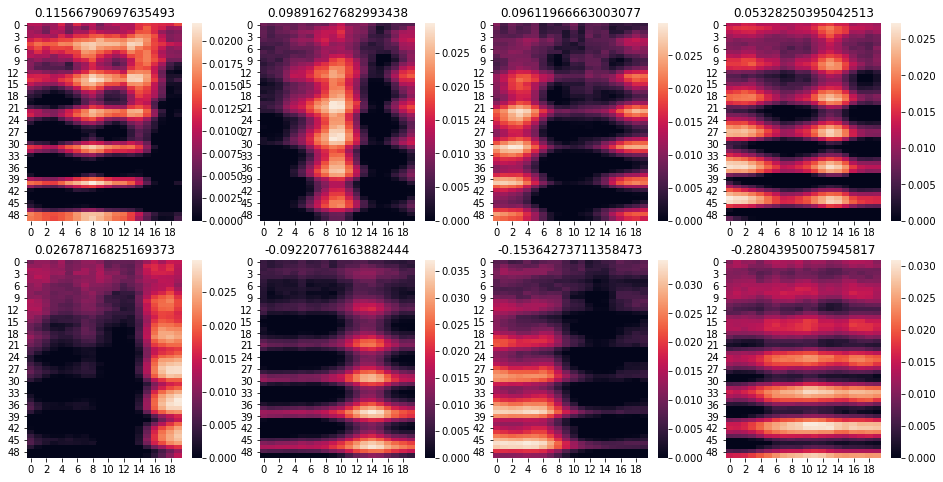

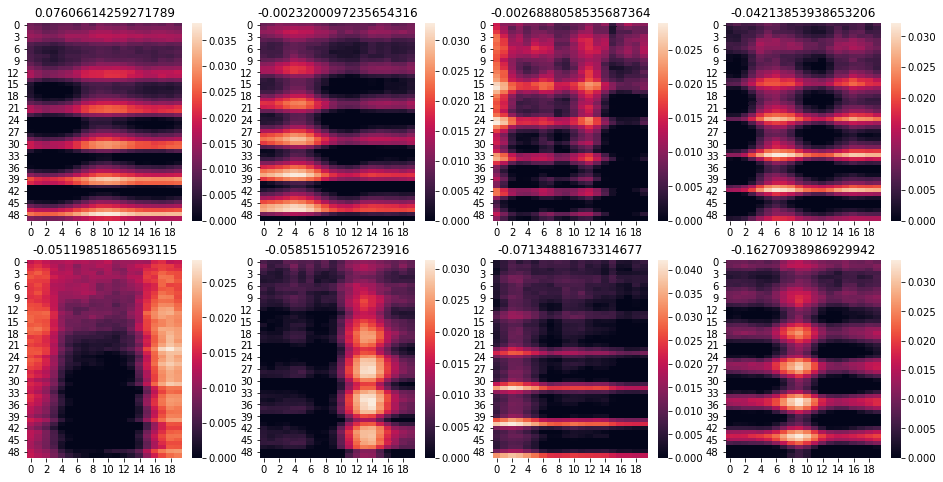

In [31]:
df = df_dynamics_ucla.copy()
Y_data = df.y
df = df.loc[:, 's1_1':'s50_20']
df = df
dict_ucla = sdl_plot(df, Y_data, "ucla.jpg")

df = df_dynamics_nws.copy()
Y_data = df.y
df = df.loc[:, 's1_1':'s50_20']
df = df
dict_nws = sdl_plot(df, Y_data, "nws.jpg")

df = df_shifted_dynamics_ucla.copy()
Y_data = df_dynamics_ucla.y
dict_ucla_s = sdl_plot(df, Y_data, "ucla_s.jpg")

df = df_shifted_dynamics_nws.copy()
Y_data = df_dynamics_nws.y
dict_nws_s = sdl_plot(df, Y_data, "nws_s.jpg")

In [34]:
dict_arr = [dict_ucla, dict_nws, dict_ucla_s, dict_nws_s]
label = ["ucla",
         "nws",
         "uclashifted",
         "nwsshifted"]
for i in range(len(dict_arr)):
    print(label[i], ":", dict_arr[i]["Accuracy"])

ucla : 0.6363636363636364
nws : 0.6055045871559633
uclashifted : 0.6843718079673136
nwsshifted : 0.6748216106014271


## SDL

In [9]:
xi = 1
iter_avg = 1
beta = 0.5
iteration = 100
r = 8
SDL_BCD_class_new = SDL_BCD(X=[X_train.to_numpy().T, y_train.to_numpy().reshape(-1,1).T],  # data, label
                        X_test=[X_test.to_numpy().T, y_test.to_numpy().reshape(-1,1).T],
                        #X_auxiliary = None,
                        n_components=r,  # =: r = number of columns in dictionary matrices W, W'
                        # ini_loading=None,  # Initializatio for [W,W'], W1.shape = [d1, r], W2.shape = [d2, r]
                        # ini_loading=[W_true, np.hstack((np.array([[0]]), Beta_true))],
                        # ini_code = H_true,
                        xi=xi,  # weight on label reconstruction error
                        L1_reg = [0,0,0], # L1 regularizer for code H, dictionary W[0], reg param W[1]
                        L2_reg = [0,0,0], # L2 regularizer for code H, dictionary W[0], reg param W[1]
                        nonnegativity=[True,True,False], # nonnegativity constraints on code H, dictionary W[0], reg params W[1]
                        full_dim=False)

results_dict_new = SDL_BCD_class_new.fit(iter=iteration, subsample_size=None,
                                                beta = beta,
                                                search_radius_const=np.linalg.norm(X_train),
                                                update_nuance_param=False,
                                                if_compute_recons_error=False, if_validate=False)

  2%|▏         | 2/100 [00:00<00:07, 13.03it/s]

initial loading beta [[-0.86066312 -0.07119486 -0.0941708  -0.39786055  0.0240567   0.67358928
  -0.71366174  0.58426165 -0.35405309]]


100%|██████████| 100/100 [00:07<00:00, 13.08it/s]


!!! pred_type filter


In [10]:
results_dict_new

{'xi': 1,
 'L1_reg': [0, 0, 0],
 'L2_reg': [0, 0, 0],
 'nonnegativity': [True, True, False],
 'n_components': 8,
 'loading': [array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.01708517e-06, 0.00000000e+00, 0.00000000e+00],
         [6.05384552e-02, 4.28484196e-02, 3.54108427e-02, ...,
          4.12946173e-02, 4.27523529e-02, 2.72292871e-02],
         [0.00000000e+00, 6.10240759e-03, 4.16931694e-03, ...,
          0.00000000e+00, 1.44898425e-03, 2.71796655e-04],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.60673718e-02, 7.77996836e-02, 0.00000000e+00],
         [6.14161331e-02, 4.30363402e-02, 3.53887136e-02, ...,
          4.04245873e-02, 4.28633100e-02, 2.71558993e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 3.30815699e-07]]),
  array([[ 1.25445555,  1.98534655,  0.84900848,  0.96598938,  1.10129449,
          -3.57101767, -1.33061087,  0.8558639 ,  0.5

## NMF

In [3]:
#plotting the dictionary elements(adjacency matrix) as networks and its corresponding degree rank plot
#n: total number of components
#weighted: if true, the degree rank plot is weighted
def plot_DL_adj_deg(n, weighted, filename=None):
    ncol = 8
    nrow = int(np.ceil(n/2))
    fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(ncol*4, nrow*4))
    
    if weighted:
        for i in range(n):
            df_adj = pd.DataFrame(W_true.T[i].reshape(20, 20))
            G = nx.Graph()
            G = nx.from_pandas_adjacency(df_adj)
            edges = G.edges()
            weights = [80*G[u][v]['weight'] for u,v in edges]
            
            
            labels = {}
            for node in G.nodes:
                labels[node] = str(node+1)

            nx.draw(G, ax=axs[(i//4)*2,i%4], width=weights,labels = labels, pos = nx.spring_layout(G))
            
            #nx.draw(G, ax=axs[(i//4)*2,i%4], width=weights)
            axs[(i//4)*2,i%4].title.set_text('Synchronizing')
            deg_seq = sorted((d for n, d in G.degree(weight='weight')), reverse=True)
            axs[(i//4)*2+1,i%4].plot(deg_seq, "b-", marker="o")

        for i in range(n):
            df_adj = pd.DataFrame(W_false.T[i].reshape(20, 20))
            G = nx.Graph()
            G = nx.from_pandas_adjacency(df_adj)
            edges = G.edges()
            weights = [80*G[u][v]['weight'] for u,v in edges]
            nx.draw(G, ax=axs[(i//4)*2,i%4+4], width=weights)
            axs[(i//4)*2,i%4+4].title.set_text('Non-Synchronizing')
            deg_seq = sorted((d for n, d in G.degree(weight='weight')), reverse=True)
            axs[(i//4)*2+1,i%4+4].plot(deg_seq, "b-", marker="o")
        if filename != None:
            fig.savefig(filename)
        plt.show()
        
    else:
        for i in range(n):
            df_adj = pd.DataFrame(W_true.T[i].reshape(20, 20))
            G = nx.Graph()
            G = nx.from_pandas_adjacency(df_adj)
            edges = G.edges()
            weights = [80*G[u][v]['weight'] for u,v in edges]
            nx.draw(G, ax=axs[(i//4)*2,i%4], width=weights)
            axs[(i//4)*2,i%4].title.set_text('Synchronizing')
            deg_seq = sorted((d for n, d in G.degree()), reverse=True)
            axs[(i//4)*2+1,i%4].plot(deg_seq, "b-", marker="o")

        for i in range(n):
            df_adj = pd.DataFrame(W_false.T[i].reshape(20, 20))
            G = nx.Graph()
            G = nx.from_pandas_adjacency(df_adj)
            edges = G.edges()
            weights = [80*G[u][v]['weight'] for u,v in edges]
            nx.draw(G, ax=axs[(i//4)*2,i%4+4], width=weights)
            axs[(i//4)*2,i%4+4].title.set_text('Non-Synchronizing')
            deg_seq = sorted((d for n, d in G.degree()), reverse=True)
            axs[(i//4)*2+1,i%4+4].plot(deg_seq, "b-", marker="o")
        if filename != None:
            fig.savefig(filename)
        plt.show()

In [71]:
df = pd.concat([df_dynamics_ucla.loc[:, 's1_1':'s50_20']/7, 
                df_adj_ucla], axis=1, join='inner').copy()
Y_data = df_dynamics_ucla.y

In [72]:
n = 4
W_false, H = ALS(X=df[Y_data == 0].to_numpy().T, 
           n_components=n, # Reconstruction Error reduces as n_components increases
           n_iter=1000, 
           a0 = 0, # L1 regularizer for H
           a1 = 0, # L1 regularizer for W
           a12 = 0, # L2 regularizer for W
           H_nonnegativity=True,
           W_nonnegativity=True,
           compute_recons_error=True,
           subsample_ratio=1)

W_true, H = ALS(X=df[Y_data != 0].to_numpy().T, 
           n_components=n, # Reconstruction Error reduces as n_components increases
           n_iter=1000, 
           a0 = 0, # L1 regularizer for H
           a1 = 0, # L1 regularizer for W
           a12 = 0, # L2 regularizer for W
           H_nonnegativity=True,
           W_nonnegativity=True,
           compute_recons_error=True,
           subsample_ratio=1)

  1%|          | 8/1000 [00:00<00:28, 34.77it/s]

iteration 0, reconstruction error 1019264.136344


  2%|▏         | 16/1000 [00:00<00:28, 35.02it/s]

iteration 10, reconstruction error 306929.869169


  3%|▎         | 28/1000 [00:00<00:27, 35.21it/s]

iteration 20, reconstruction error 352203.448722


  4%|▎         | 36/1000 [00:01<00:27, 35.12it/s]

iteration 30, reconstruction error 328657.566550


  5%|▍         | 49/1000 [00:01<00:25, 37.34it/s]

iteration 40, reconstruction error 275012.729918


  6%|▌         | 57/1000 [00:01<00:25, 36.85it/s]

iteration 50, reconstruction error 254173.090219


  6%|▋         | 65/1000 [00:01<00:26, 35.51it/s]

iteration 60, reconstruction error 252946.964325


  8%|▊         | 79/1000 [00:02<00:23, 39.04it/s]

iteration 70, reconstruction error 252565.739916


  9%|▉         | 88/1000 [00:02<00:23, 39.39it/s]

iteration 80, reconstruction error 252278.541355


 10%|▉         | 97/1000 [00:02<00:22, 39.91it/s]

iteration 90, reconstruction error 252054.214229


 10%|█         | 105/1000 [00:02<00:23, 38.30it/s]

iteration 100, reconstruction error 251877.613769


 12%|█▏        | 118/1000 [00:03<00:23, 38.34it/s]

iteration 110, reconstruction error 251737.963935


 13%|█▎        | 127/1000 [00:03<00:22, 38.56it/s]

iteration 120, reconstruction error 251627.266836


 14%|█▎        | 136/1000 [00:03<00:21, 39.50it/s]

iteration 130, reconstruction error 251539.408700


 15%|█▍        | 149/1000 [00:03<00:21, 39.30it/s]

iteration 140, reconstruction error 251468.953418


 16%|█▌        | 157/1000 [00:04<00:22, 36.98it/s]

iteration 150, reconstruction error 251411.660548


 16%|█▋        | 165/1000 [00:04<00:23, 36.19it/s]

iteration 160, reconstruction error 251364.693036


 18%|█▊        | 177/1000 [00:04<00:23, 35.62it/s]

iteration 170, reconstruction error 251325.882406


 19%|█▊        | 186/1000 [00:05<00:21, 37.97it/s]

iteration 180, reconstruction error 251293.163365


 19%|█▉        | 194/1000 [00:05<00:26, 30.93it/s]

iteration 190, reconstruction error 251265.196268


 21%|██        | 206/1000 [00:05<00:22, 34.73it/s]

iteration 200, reconstruction error 251240.983093


 22%|██▏       | 216/1000 [00:05<00:20, 38.06it/s]

iteration 210, reconstruction error 251219.824668


 23%|██▎       | 226/1000 [00:06<00:19, 39.18it/s]

iteration 220, reconstruction error 251201.197713


 24%|██▍       | 239/1000 [00:06<00:19, 39.39it/s]

iteration 230, reconstruction error 251184.663337


 25%|██▍       | 248/1000 [00:06<00:18, 39.59it/s]

iteration 240, reconstruction error 251169.885057


 26%|██▌       | 257/1000 [00:06<00:18, 39.75it/s]

iteration 250, reconstruction error 251156.561234


 27%|██▋       | 266/1000 [00:07<00:18, 39.53it/s]

iteration 260, reconstruction error 251144.462240


 28%|██▊       | 276/1000 [00:07<00:18, 39.84it/s]

iteration 270, reconstruction error 251133.383019


 29%|██▊       | 286/1000 [00:07<00:17, 39.69it/s]

iteration 280, reconstruction error 251123.150085


 30%|██▉       | 296/1000 [00:07<00:17, 40.37it/s]

iteration 290, reconstruction error 251113.629826


 31%|███       | 306/1000 [00:08<00:17, 40.55it/s]

iteration 300, reconstruction error 251104.711439


 32%|███▏      | 316/1000 [00:08<00:16, 40.26it/s]

iteration 310, reconstruction error 251096.303510


 33%|███▎      | 326/1000 [00:08<00:16, 40.62it/s]

iteration 320, reconstruction error 251088.325051


 34%|███▎      | 336/1000 [00:08<00:16, 40.18it/s]

iteration 330, reconstruction error 251080.709017


 35%|███▍      | 346/1000 [00:09<00:16, 39.96it/s]

iteration 340, reconstruction error 251073.407170


 36%|███▌      | 356/1000 [00:09<00:16, 39.68it/s]

iteration 350, reconstruction error 251066.365511


 37%|███▋      | 366/1000 [00:09<00:15, 40.56it/s]

iteration 360, reconstruction error 251059.540642


 38%|███▊      | 376/1000 [00:09<00:15, 40.73it/s]

iteration 370, reconstruction error 251052.897716


 39%|███▊      | 386/1000 [00:10<00:15, 40.82it/s]

iteration 380, reconstruction error 251046.406512


 40%|███▉      | 396/1000 [00:10<00:15, 39.30it/s]

iteration 390, reconstruction error 251040.044797


 41%|████      | 408/1000 [00:10<00:15, 38.48it/s]

iteration 400, reconstruction error 251033.798156


 42%|████▏     | 416/1000 [00:10<00:15, 37.97it/s]

iteration 410, reconstruction error 251027.645414


 42%|████▎     | 425/1000 [00:11<00:14, 38.54it/s]

iteration 420, reconstruction error 251021.571908


 44%|████▍     | 439/1000 [00:11<00:14, 39.44it/s]

iteration 430, reconstruction error 251015.570632


 45%|████▍     | 448/1000 [00:11<00:13, 39.65it/s]

iteration 440, reconstruction error 251009.626674


 46%|████▌     | 457/1000 [00:12<00:13, 39.55it/s]

iteration 450, reconstruction error 251003.730069


 46%|████▋     | 465/1000 [00:12<00:14, 37.10it/s]

iteration 460, reconstruction error 250997.870755


 48%|████▊     | 478/1000 [00:12<00:13, 38.27it/s]

iteration 470, reconstruction error 250992.035444


 49%|████▊     | 486/1000 [00:12<00:13, 38.57it/s]

iteration 480, reconstruction error 250986.215942


 50%|████▉     | 496/1000 [00:13<00:12, 38.90it/s]

iteration 490, reconstruction error 250980.412917


 51%|█████     | 508/1000 [00:13<00:12, 38.28it/s]

iteration 500, reconstruction error 250974.643960


 52%|█████▏    | 516/1000 [00:13<00:13, 36.60it/s]

iteration 510, reconstruction error 250968.893354


 53%|█████▎    | 528/1000 [00:13<00:13, 35.33it/s]

iteration 520, reconstruction error 250963.139811


 54%|█████▎    | 537/1000 [00:14<00:12, 37.23it/s]

iteration 530, reconstruction error 250957.381130


 55%|█████▍    | 545/1000 [00:14<00:13, 34.67it/s]

iteration 540, reconstruction error 250951.613387


 56%|█████▌    | 559/1000 [00:14<00:11, 37.84it/s]

iteration 550, reconstruction error 250945.833197


 57%|█████▋    | 567/1000 [00:14<00:11, 36.34it/s]

iteration 560, reconstruction error 250940.045690


 57%|█████▊    | 575/1000 [00:15<00:11, 35.45it/s]

iteration 570, reconstruction error 250934.240295


 59%|█████▉    | 588/1000 [00:15<00:11, 36.56it/s]

iteration 580, reconstruction error 250928.407655


 60%|█████▉    | 596/1000 [00:15<00:10, 36.95it/s]

iteration 590, reconstruction error 250922.554609


 60%|██████    | 604/1000 [00:16<00:11, 35.76it/s]

iteration 600, reconstruction error 250916.683979


 62%|██████▏   | 617/1000 [00:16<00:10, 35.56it/s]

iteration 610, reconstruction error 250910.794192


 63%|██████▎   | 626/1000 [00:16<00:10, 37.40it/s]

iteration 620, reconstruction error 250904.873023


 63%|██████▎   | 634/1000 [00:16<00:11, 32.87it/s]

iteration 630, reconstruction error 250898.930412


 65%|██████▍   | 646/1000 [00:17<00:11, 31.79it/s]

iteration 640, reconstruction error 250892.973761


 66%|██████▌   | 658/1000 [00:17<00:10, 33.86it/s]

iteration 650, reconstruction error 250887.005689


 67%|██████▋   | 666/1000 [00:17<00:09, 33.61it/s]

iteration 660, reconstruction error 250881.009380


 67%|██████▋   | 674/1000 [00:18<00:09, 32.85it/s]

iteration 670, reconstruction error 250874.966401


 69%|██████▊   | 687/1000 [00:18<00:08, 36.35it/s]

iteration 680, reconstruction error 250868.882335


 70%|██████▉   | 695/1000 [00:18<00:08, 36.97it/s]

iteration 690, reconstruction error 250862.752161


 71%|███████   | 709/1000 [00:19<00:07, 39.08it/s]

iteration 700, reconstruction error 250856.581113


 72%|███████▏  | 718/1000 [00:19<00:07, 39.20it/s]

iteration 710, reconstruction error 250850.355759


 73%|███████▎  | 726/1000 [00:19<00:07, 38.55it/s]

iteration 720, reconstruction error 250844.076903


 74%|███████▍  | 738/1000 [00:19<00:07, 36.53it/s]

iteration 730, reconstruction error 250837.752716


 75%|███████▍  | 746/1000 [00:20<00:07, 34.53it/s]

iteration 740, reconstruction error 250831.412923


 76%|███████▌  | 759/1000 [00:20<00:06, 36.02it/s]

iteration 750, reconstruction error 250825.053559


 77%|███████▋  | 767/1000 [00:20<00:06, 36.04it/s]

iteration 760, reconstruction error 250818.651471


 78%|███████▊  | 775/1000 [00:20<00:06, 36.70it/s]

iteration 770, reconstruction error 250812.206287


 79%|███████▉  | 789/1000 [00:21<00:05, 38.03it/s]

iteration 780, reconstruction error 250805.720332


 80%|███████▉  | 797/1000 [00:21<00:05, 36.28it/s]

iteration 790, reconstruction error 250799.179257


 80%|████████  | 805/1000 [00:21<00:05, 35.07it/s]

iteration 800, reconstruction error 250792.571971


 82%|████████▏ | 817/1000 [00:22<00:05, 35.42it/s]

iteration 810, reconstruction error 250785.885232


 82%|████████▎ | 825/1000 [00:22<00:05, 33.70it/s]

iteration 820, reconstruction error 250779.124761


 84%|████████▎ | 837/1000 [00:22<00:04, 34.30it/s]

iteration 830, reconstruction error 250772.299502


 84%|████████▍ | 845/1000 [00:22<00:04, 34.83it/s]

iteration 840, reconstruction error 250765.425679


 86%|████████▌ | 857/1000 [00:23<00:04, 35.10it/s]

iteration 850, reconstruction error 250758.498970


 86%|████████▋ | 865/1000 [00:23<00:03, 35.22it/s]

iteration 860, reconstruction error 250751.514196


 88%|████████▊ | 877/1000 [00:23<00:03, 33.57it/s]

iteration 870, reconstruction error 250744.481430


 88%|████████▊ | 885/1000 [00:24<00:03, 34.51it/s]

iteration 880, reconstruction error 250737.398408


 90%|████████▉ | 897/1000 [00:24<00:02, 34.57it/s]

iteration 890, reconstruction error 250730.247402


 90%|█████████ | 905/1000 [00:24<00:02, 33.79it/s]

iteration 900, reconstruction error 250723.021649


 92%|█████████▏| 917/1000 [00:24<00:02, 34.47it/s]

iteration 910, reconstruction error 250715.741056


 92%|█████████▎| 925/1000 [00:25<00:02, 35.07it/s]

iteration 920, reconstruction error 250708.398624


 94%|█████████▎| 937/1000 [00:25<00:01, 34.43it/s]

iteration 930, reconstruction error 250700.997666


 94%|█████████▍| 945/1000 [00:25<00:01, 34.52it/s]

iteration 940, reconstruction error 250693.544588


 96%|█████████▌| 957/1000 [00:26<00:01, 31.85it/s]

iteration 950, reconstruction error 250686.040378


 96%|█████████▋| 965/1000 [00:26<00:01, 32.39it/s]

iteration 960, reconstruction error 250678.486671


 98%|█████████▊| 977/1000 [00:26<00:00, 34.45it/s]

iteration 970, reconstruction error 250670.876916


 98%|█████████▊| 985/1000 [00:26<00:00, 34.45it/s]

iteration 980, reconstruction error 250663.215526


100%|█████████▉| 997/1000 [00:27<00:00, 34.37it/s]

iteration 990, reconstruction error 250655.498350


  0%|          | 2/1000 [00:00<02:14,  7.41it/s]

iteration 0, reconstruction error 3137767.223107


  1%|          | 11/1000 [00:01<01:31, 10.76it/s]

iteration 10, reconstruction error 945006.170112


  2%|▏         | 23/1000 [00:04<02:32,  6.42it/s]

iteration 20, reconstruction error 1046599.382482


  3%|▎         | 32/1000 [00:05<01:56,  8.28it/s]

iteration 30, reconstruction error 804347.571320


  4%|▍         | 43/1000 [00:06<01:43,  9.28it/s]

iteration 40, reconstruction error 733043.601110


  5%|▌         | 53/1000 [00:07<01:19, 11.96it/s]

iteration 50, reconstruction error 721921.494617


  6%|▋         | 63/1000 [00:07<01:13, 12.69it/s]

iteration 60, reconstruction error 720612.203027


  7%|▋         | 73/1000 [00:08<01:12, 12.83it/s]

iteration 70, reconstruction error 720190.391321


  8%|▊         | 83/1000 [00:09<01:09, 13.17it/s]

iteration 80, reconstruction error 719983.567561


  9%|▉         | 93/1000 [00:10<01:08, 13.16it/s]

iteration 90, reconstruction error 719869.240809


 10%|█         | 103/1000 [00:11<01:07, 13.21it/s]

iteration 100, reconstruction error 719799.978132


 11%|█▏        | 113/1000 [00:11<01:06, 13.27it/s]

iteration 110, reconstruction error 719754.751749


 12%|█▏        | 123/1000 [00:12<01:06, 13.15it/s]

iteration 120, reconstruction error 719723.302649


 13%|█▎        | 133/1000 [00:13<01:05, 13.17it/s]

iteration 130, reconstruction error 719700.237101


 14%|█▍        | 143/1000 [00:14<01:04, 13.22it/s]

iteration 140, reconstruction error 719682.487982


 15%|█▌        | 153/1000 [00:14<01:04, 13.06it/s]

iteration 150, reconstruction error 719668.271620


 16%|█▋        | 163/1000 [00:15<01:03, 13.18it/s]

iteration 160, reconstruction error 719656.440505


 17%|█▋        | 173/1000 [00:16<01:02, 13.15it/s]

iteration 170, reconstruction error 719646.249877


 18%|█▊        | 183/1000 [00:17<01:01, 13.22it/s]

iteration 180, reconstruction error 719637.170799


 19%|█▉        | 193/1000 [00:17<01:00, 13.35it/s]

iteration 190, reconstruction error 719628.858615


 20%|██        | 203/1000 [00:18<00:59, 13.37it/s]

iteration 200, reconstruction error 719621.046620


 21%|██▏       | 213/1000 [00:19<01:00, 12.99it/s]

iteration 210, reconstruction error 719613.566098


 22%|██▏       | 223/1000 [00:20<00:58, 13.35it/s]

iteration 220, reconstruction error 719606.293303


 23%|██▎       | 233/1000 [00:20<00:57, 13.43it/s]

iteration 230, reconstruction error 719599.121229


 24%|██▍       | 243/1000 [00:21<00:56, 13.45it/s]

iteration 240, reconstruction error 719591.950930


 25%|██▌       | 253/1000 [00:22<00:56, 13.26it/s]

iteration 250, reconstruction error 719584.713912


 26%|██▋       | 263/1000 [00:22<00:55, 13.29it/s]

iteration 260, reconstruction error 719577.366880


 27%|██▋       | 273/1000 [00:23<00:53, 13.49it/s]

iteration 270, reconstruction error 719569.842049


 28%|██▊       | 283/1000 [00:24<00:53, 13.37it/s]

iteration 280, reconstruction error 719562.083689


 29%|██▉       | 293/1000 [00:25<00:52, 13.42it/s]

iteration 290, reconstruction error 719554.049686


 30%|███       | 303/1000 [00:25<00:52, 13.38it/s]

iteration 300, reconstruction error 719545.689351


 31%|███▏      | 313/1000 [00:26<00:53, 12.77it/s]

iteration 310, reconstruction error 719536.972593


 32%|███▏      | 323/1000 [00:27<00:51, 13.24it/s]

iteration 320, reconstruction error 719527.870850


 33%|███▎      | 333/1000 [00:28<00:51, 13.04it/s]

iteration 330, reconstruction error 719518.326734


 34%|███▍      | 343/1000 [00:28<00:49, 13.34it/s]

iteration 340, reconstruction error 719508.271760


 35%|███▌      | 353/1000 [00:29<00:48, 13.21it/s]

iteration 350, reconstruction error 719497.647102


 36%|███▋      | 363/1000 [00:30<00:48, 13.19it/s]

iteration 360, reconstruction error 719486.425919


 37%|███▋      | 373/1000 [00:31<00:47, 13.29it/s]

iteration 370, reconstruction error 719474.585115


 38%|███▊      | 383/1000 [00:32<00:51, 11.94it/s]

iteration 380, reconstruction error 719462.113709


 39%|███▉      | 393/1000 [00:32<00:47, 12.66it/s]

iteration 390, reconstruction error 719448.973884


 40%|████      | 403/1000 [00:33<00:49, 11.95it/s]

iteration 400, reconstruction error 719435.103989


 41%|████▏     | 413/1000 [00:34<00:53, 10.97it/s]

iteration 410, reconstruction error 719420.459507


 42%|████▏     | 422/1000 [00:36<01:29,  6.43it/s]

iteration 420, reconstruction error 719405.002003


 43%|████▎     | 433/1000 [00:37<01:06,  8.48it/s]

iteration 430, reconstruction error 719388.675608


 44%|████▍     | 443/1000 [00:38<00:54, 10.15it/s]

iteration 440, reconstruction error 719371.418234


 45%|████▌     | 453/1000 [00:39<00:47, 11.41it/s]

iteration 450, reconstruction error 719353.157348


 46%|████▋     | 463/1000 [00:40<00:46, 11.54it/s]

iteration 460, reconstruction error 719333.838116


 47%|████▋     | 473/1000 [00:41<00:43, 12.25it/s]

iteration 470, reconstruction error 719313.404540


 48%|████▊     | 483/1000 [00:41<00:42, 12.25it/s]

iteration 480, reconstruction error 719291.772615


 49%|████▉     | 493/1000 [00:42<00:40, 12.65it/s]

iteration 490, reconstruction error 719268.895886


 50%|█████     | 503/1000 [00:43<00:40, 12.35it/s]

iteration 500, reconstruction error 719244.719344


 51%|█████▏    | 513/1000 [00:44<00:39, 12.36it/s]

iteration 510, reconstruction error 719219.338376


 52%|█████▏    | 523/1000 [00:45<00:37, 12.66it/s]

iteration 520, reconstruction error 719192.889447


 53%|█████▎    | 533/1000 [00:45<00:36, 12.73it/s]

iteration 530, reconstruction error 719165.433721


 54%|█████▍    | 543/1000 [00:46<00:36, 12.51it/s]

iteration 540, reconstruction error 719137.083829


 55%|█████▌    | 553/1000 [00:47<00:34, 13.00it/s]

iteration 550, reconstruction error 719107.926248


 56%|█████▋    | 563/1000 [00:48<00:33, 12.86it/s]

iteration 560, reconstruction error 719077.987638


 57%|█████▋    | 573/1000 [00:48<00:32, 13.07it/s]

iteration 570, reconstruction error 719047.283129


 58%|█████▊    | 583/1000 [00:49<00:33, 12.54it/s]

iteration 580, reconstruction error 719015.895107


 59%|█████▉    | 593/1000 [00:50<00:31, 13.11it/s]

iteration 590, reconstruction error 718983.989366


 60%|██████    | 603/1000 [00:51<00:29, 13.26it/s]

iteration 600, reconstruction error 718951.623648


 61%|██████▏   | 613/1000 [00:52<00:28, 13.44it/s]

iteration 610, reconstruction error 718918.807822


 62%|██████▏   | 623/1000 [00:52<00:30, 12.51it/s]

iteration 620, reconstruction error 718885.516129


 63%|██████▎   | 633/1000 [00:53<00:27, 13.25it/s]

iteration 630, reconstruction error 718851.788119


 64%|██████▍   | 643/1000 [00:54<00:28, 12.53it/s]

iteration 640, reconstruction error 718817.681522


 65%|██████▌   | 653/1000 [00:55<00:27, 12.42it/s]

iteration 650, reconstruction error 718783.169177


 66%|██████▋   | 663/1000 [00:55<00:26, 12.70it/s]

iteration 660, reconstruction error 718748.255420


 67%|██████▋   | 673/1000 [00:56<00:24, 13.16it/s]

iteration 670, reconstruction error 718713.035278


 68%|██████▊   | 683/1000 [00:57<00:25, 12.50it/s]

iteration 680, reconstruction error 718677.577179


 69%|██████▉   | 693/1000 [00:58<00:24, 12.76it/s]

iteration 690, reconstruction error 718641.921305


 70%|███████   | 703/1000 [00:58<00:22, 12.94it/s]

iteration 700, reconstruction error 718606.130517


 71%|███████▏  | 713/1000 [00:59<00:22, 12.85it/s]

iteration 710, reconstruction error 718570.264158


 72%|███████▏  | 723/1000 [01:00<00:20, 13.30it/s]

iteration 720, reconstruction error 718534.380003


 73%|███████▎  | 733/1000 [01:01<00:21, 12.50it/s]

iteration 730, reconstruction error 718498.571141


 74%|███████▍  | 743/1000 [01:02<00:20, 12.52it/s]

iteration 740, reconstruction error 718462.913943


 75%|███████▌  | 753/1000 [01:02<00:19, 12.48it/s]

iteration 750, reconstruction error 718427.448033


 76%|███████▋  | 763/1000 [01:03<00:18, 12.67it/s]

iteration 760, reconstruction error 718392.259473


 77%|███████▋  | 773/1000 [01:04<00:18, 12.48it/s]

iteration 770, reconstruction error 718357.427923


 78%|███████▊  | 783/1000 [01:05<00:17, 12.33it/s]

iteration 780, reconstruction error 718323.022931


 79%|███████▉  | 793/1000 [01:06<00:16, 12.26it/s]

iteration 790, reconstruction error 718289.089857


 80%|████████  | 803/1000 [01:06<00:15, 12.77it/s]

iteration 800, reconstruction error 718255.734641


 81%|████████▏ | 813/1000 [01:07<00:14, 12.88it/s]

iteration 810, reconstruction error 718223.091708


 82%|████████▏ | 823/1000 [01:08<00:15, 11.70it/s]

iteration 820, reconstruction error 718191.263453


 83%|████████▎ | 833/1000 [01:09<00:13, 12.41it/s]

iteration 830, reconstruction error 718160.329402


 84%|████████▍ | 843/1000 [01:09<00:12, 12.82it/s]

iteration 840, reconstruction error 718130.357677


 85%|████████▌ | 853/1000 [01:10<00:11, 12.93it/s]

iteration 850, reconstruction error 718101.437067


 86%|████████▋ | 863/1000 [01:11<00:10, 13.01it/s]

iteration 860, reconstruction error 718073.649569


 87%|████████▋ | 873/1000 [01:12<00:09, 12.93it/s]

iteration 870, reconstruction error 718047.043164


 88%|████████▊ | 883/1000 [01:13<00:08, 13.06it/s]

iteration 880, reconstruction error 718021.691283


 89%|████████▉ | 893/1000 [01:13<00:08, 12.90it/s]

iteration 890, reconstruction error 717997.650748


 90%|█████████ | 903/1000 [01:14<00:07, 12.77it/s]

iteration 900, reconstruction error 717974.930771


 91%|█████████▏| 913/1000 [01:15<00:06, 12.65it/s]

iteration 910, reconstruction error 717953.497692


 92%|█████████▏| 923/1000 [01:16<00:05, 12.96it/s]

iteration 920, reconstruction error 717933.327069


 93%|█████████▎| 933/1000 [01:16<00:05, 12.97it/s]

iteration 930, reconstruction error 717914.389487


 94%|█████████▍| 943/1000 [01:17<00:04, 13.05it/s]

iteration 940, reconstruction error 717896.656911


 95%|█████████▌| 953/1000 [01:18<00:03, 13.01it/s]

iteration 950, reconstruction error 717880.122579


 96%|█████████▋| 963/1000 [01:19<00:02, 12.98it/s]

iteration 960, reconstruction error 717864.751059


 97%|█████████▋| 973/1000 [01:19<00:02, 13.05it/s]

iteration 970, reconstruction error 717850.451511


 98%|█████████▊| 983/1000 [01:20<00:01, 13.00it/s]

iteration 980, reconstruction error 717837.126882


 99%|█████████▉| 993/1000 [01:21<00:00, 12.98it/s]

iteration 990, reconstruction error 717824.706781


100%|██████████| 1000/1000 [01:21<00:00, 12.20it/s]


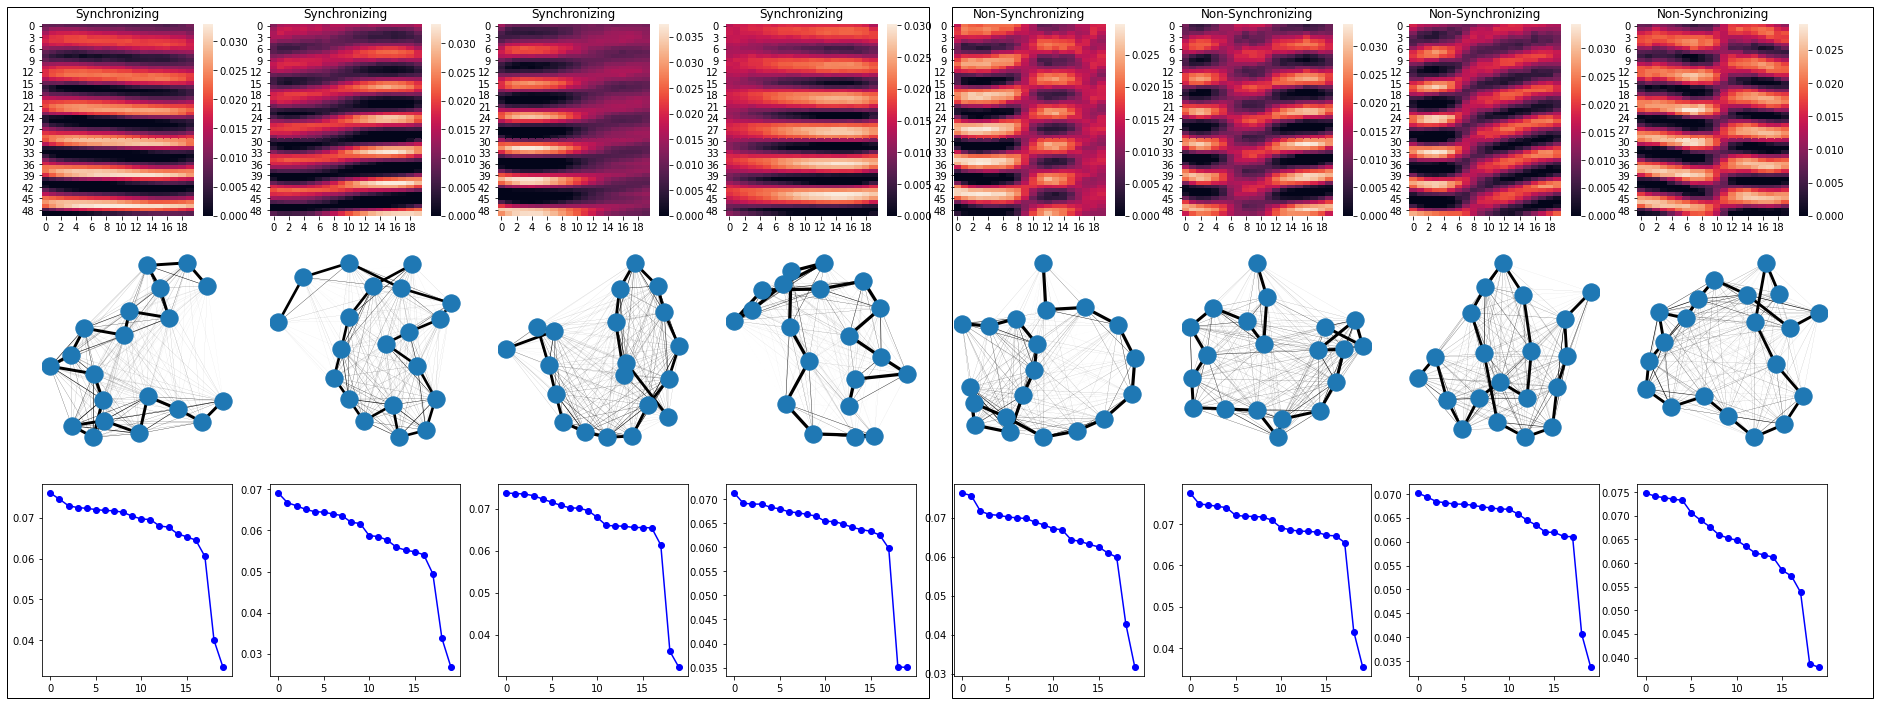

In [73]:
ncol = 8
nrow = 3
r = 4
fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(ncol*4, nrow*4))
for i in range(r):
    ind = sorted_indices[i]
    sns.heatmap(W_true.T[i][0:1000].reshape(50, 20),
                ax = axs[i//ncol, i%ncol])
    axs[i//ncol, i%ncol].title.set_text("Synchronizing")
    
    df_adj = pd.DataFrame(W_true.T[i][1000:].reshape(20, 20))
    G = nx.Graph()
    G = nx.from_pandas_adjacency(df_adj)
    edges = G.edges()
    weights = [120*G[u][v]['weight'] for u,v in edges]
    nx.draw(G, ax=axs[i//ncol+1, i%ncol], width=weights)
    
    deg_seq = sorted((d for n, d in G.degree(weight='weight')), reverse=True)
    axs[i//ncol+2, i%ncol].plot(deg_seq, "b-", marker="o")
    

    ind = sorted_indices[i]
    sns.heatmap(W_false.T[i][0:1000].reshape(50, 20),
                ax = axs[i//ncol, i%ncol+4])
    axs[i//ncol, i%ncol+4].title.set_text("Non-Synchronizing")
    
    df_adj = pd.DataFrame(W_false.T[i][1000:].reshape(20, 20))
    G = nx.Graph()
    G = nx.from_pandas_adjacency(df_adj)
    edges = G.edges()
    weights = [120*G[u][v]['weight'] for u,v in edges]
    nx.draw(G, ax=axs[i//ncol+1, i%ncol+4], width=weights)
    
    deg_seq = sorted((d for n, d in G.degree(weight='weight')), reverse=True)
    axs[i//ncol+2, i%ncol+4].plot(deg_seq, "b-", marker="o")
    
rect = plt.Rectangle((0.11, 0.1), 0.4, 0.8, fill=False, color="k", lw=1, 
                     zorder=1000, transform=fig.transFigure, figure=fig)
fig.patches.extend([rect])
rect = plt.Rectangle((0.52, 0.1), 0.4, 0.8, fill=False, color="k", lw=1, 
                     zorder=1000, transform=fig.transFigure, figure=fig)
fig.patches.extend([rect])

In [74]:
fig.savefig("temp.jpg")

# SDL

In [30]:
df = pd.concat([df_dynamics_ucla.loc[:, 's1_1':'s50_20']/7, 
                df_adj_ucla], axis=1, join='inner').copy()
Y_data = df_dynamics_nws.y
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(df, Y_data)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size = 0.2, 
                                                    random_state = 4, 
                                                    stratify = y_res)

In [31]:
xi = 1
iter_avg = 1
beta = 0.5
iteration = 100
r = 8
SDL_BCD_class_new = SDL_BCD(X=[X_train.to_numpy().T, y_train.to_numpy().reshape(-1,1).T],  # data, label
                        X_test=[X_test.to_numpy().T, y_test.to_numpy().reshape(-1,1).T],
                        #X_auxiliary = None,
                        n_components=r,  # =: r = number of columns in dictionary matrices W, W'
                        # ini_loading=None,  # Initializatio for [W,W'], W1.shape = [d1, r], W2.shape = [d2, r]
                        # ini_loading=[W_true, np.hstack((np.array([[0]]), Beta_true))],
                        # ini_code = H_true,
                        xi=xi,  # weight on label reconstruction error
                        L1_reg = [0,0,0], # L1 regularizer for code H, dictionary W[0], reg param W[1]
                        L2_reg = [0,0,0], # L2 regularizer for code H, dictionary W[0], reg param W[1]
                        nonnegativity=[True,True,False], # nonnegativity constraints on code H, dictionary W[0], reg params W[1]
                        full_dim=False)

results_dict_new = SDL_BCD_class_new.fit(iter=iteration, subsample_size=None,
                                                beta = beta,
                                                search_radius_const=np.linalg.norm(X_train),
                                                update_nuance_param=False,
                                                if_compute_recons_error=False, if_validate=False)

  1%|          | 1/100 [00:00<00:12,  7.81it/s]

initial loading beta [[-0.72808415  0.55102391 -0.58305032 -0.62248919  0.8136951  -0.66736245
   0.65156587  0.14197612  0.72689868]]


100%|██████████| 100/100 [00:12<00:00,  8.10it/s]


!!! pred_type filter


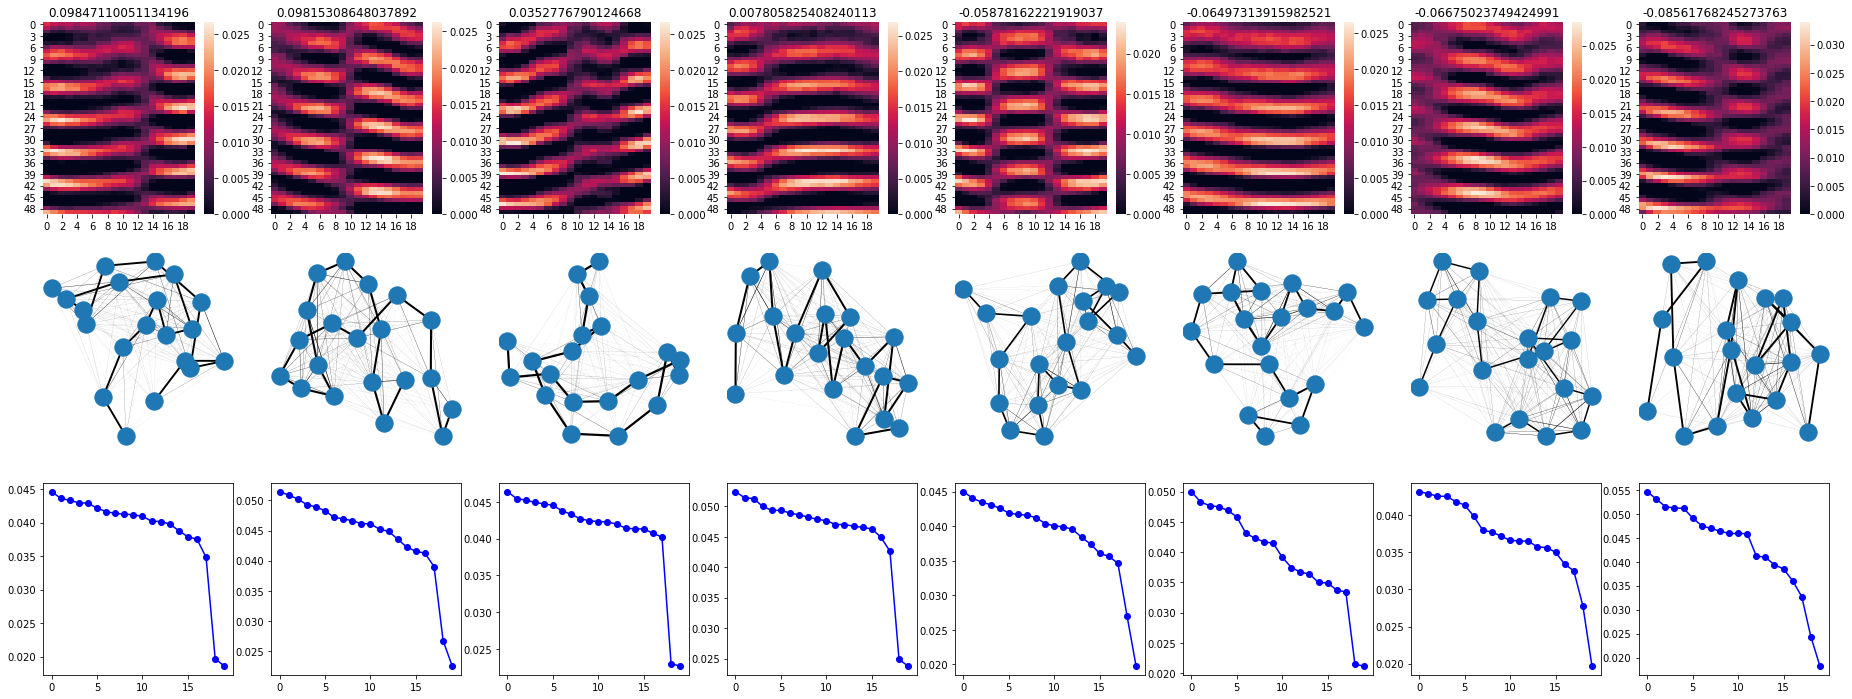

In [32]:
ncol = 8
nrow = 3
r = 8
fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(ncol*4, nrow*4))
sorted_indices = np.argsort(results_dict_new["loading"][1][0][1:])[::-1]
for i in range(r):
    ind = sorted_indices[i]
    sns.heatmap(results_dict_new["loading"][0].T[ind][0:1000].reshape(50, 20),
                ax = axs[i//ncol, (i-4)%ncol])
    axs[i//ncol, i%ncol].title.set_text(str(results_dict_new["loading"][1][0][1:][sorted_indices[i]]))
    
    df_adj = pd.DataFrame(results_dict_new["loading"][0].T[ind][1000:].reshape(20, 20))
    G = nx.Graph()
    G = nx.from_pandas_adjacency(df_adj)
    edges = G.edges()
    weights = [120*G[u][v]['weight'] for u,v in edges]
    nx.draw(G, ax=axs[i//ncol+1, i%ncol], width=weights)
    
    deg_seq = sorted((d for n, d in G.degree(weight='weight')), reverse=True)
    axs[i//ncol+2, i%ncol].plot(deg_seq, "b-", marker="o")

In [33]:
fig.savefig("temp.jpg")

In [34]:
results_dict_new

{'xi': 1,
 'L1_reg': [0, 0, 0],
 'L2_reg': [0, 0, 0],
 'nonnegativity': [True, True, False],
 'n_components': 8,
 'loading': [array([[6.99986751e-03, 1.25705011e-02, 6.56120175e-03, ...,
          5.73264262e-03, 1.03273974e-02, 1.96743130e-03],
         [9.37055107e-03, 1.44120062e-02, 6.48852192e-03, ...,
          8.02896235e-03, 9.94335236e-03, 0.00000000e+00],
         [1.06431395e-02, 1.26950563e-02, 7.81252780e-03, ...,
          1.04153867e-02, 6.51560907e-03, 0.00000000e+00],
         ...,
         [3.82191233e-03, 1.23905372e-03, 1.90490390e-03, ...,
          3.29094728e-03, 1.38433396e-03, 2.84564866e-03],
         [1.70586508e-02, 1.58330902e-02, 1.84592720e-02, ...,
          1.56015800e-02, 1.49997645e-02, 1.19717707e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 7.36626345e-09, 0.00000000e+00]]),
  array([[ 0.00177839,  0.09815309,  0.0984711 ,  0.03527768, -0.05878162,
           0.00780583, -0.08561768, -0.06497314, -0.0